**IMPORTAMOS LAS LIBRERIAS**

In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

**CARGAMOS EL DATASET**

In [2]:
file_path = './Excel_Problema-Lab-03_Ventas-producto-tecnologico_Estadistica-Aplicada-al-Marketing.xlsx'
df = pd.read_excel(file_path)

**Exploracion inicial de los datos**

In [3]:
print(df.head())
print(df.describe())

      Semana  Ventas  TV grps 20seg AD55  inversion TV  radio grps 20seg AD15  \
0 2022-01-02      76             42.0000      14635.46                     50   
1 2022-01-09      85            132.8000      14635.46                     51   
2 2022-01-16      81             94.1200      14635.46                     50   
3 2022-01-23      86             71.6480      13623.01                     51   
4 2022-01-30      84             47.6592       7548.30                     53   

   inversion radio  FB impresiones  FB clics  inversion FB  \
0          6587.78           48694      2169          8899   
1          6311.32           48694      2169          8899   
2          6551.96           48694      2169          8899   
3          6361.63           50478      2473          9089   
4          6900.81           61182      4297         10233   

   TV grps 20seg competidor 1  TV grps 20seg competidor 2  \
0                          34                           6   
1                 

**Definir variables independientes (X) y variable dependiente (y)**

In [4]:
X = df[['TV grps 20seg AD55', 'inversion TV', 
        'radio grps 20seg AD15', 'inversion radio', 
        'FB impresiones', 'FB clics', 'inversion FB', 
        'TV grps 20seg competidor 1', 'TV grps 20seg competidor 2', 'TV grps 20seg competidor 3', 
        'paro']]
y = df['Ventas']


# Añadir constante a X para el término independiente
X = sm.add_constant(X)

**Creacion del modelo de Regresion Lineal - OLS (Ordinary Least Squares)**

In [5]:
modelo = sm.OLS(y, X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ventas   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     9.487
Date:                Sun, 07 Jul 2024   Prob (F-statistic):           0.000159
Time:                        18:29:29   Log-Likelihood:                -70.810
No. Observations:                  25   AIC:                             165.6
Df Residuals:                      13   BIC:                             180.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

**Visualizacion de los resultados**

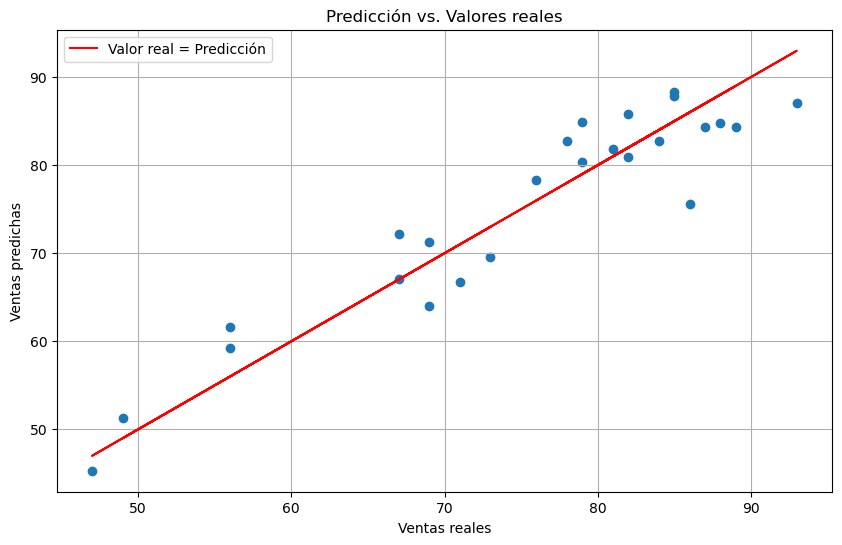

In [6]:
predicciones = modelo.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, predicciones)
plt.plot(y, y, color='red', label='Valor real = Predicción')
plt.xlabel('Ventas reales')
plt.ylabel('Ventas predichas')
plt.title('Predicción vs. Valores reales')
plt.legend()
plt.grid(True)
plt.show()

# Analisis de los datos

**Estadísticas Descriptivas**:

La media de ventas semanales es de aproximadamente 75 unidades, con un mínimo de 47 y un máximo de 93.
Las inversiones en publicidad varían significativamente, con desviaciones estándar considerables, especialmente en las inversiones de TV y radio.

**Coeficientes del Modelo**:

R-cuadrado ajustado: El modelo tiene un R-cuadrado ajustado de 0.795, lo que indica que aproximadamente el 79.5% de la variabilidad en las ventas semanales puede explicarse por las variables incluidas en el modelo.

**Coeficientes significativos**:

Las variables significativas (con p-valores menores a 0.05) son: TV grps 20seg AD55 (positivo), inversion TV (negativo), y radio grps 20seg AD15 (positivo). Esto sugiere que un aumento en los GRPs de TV y radio podría estar asociado con aumentos en las ventas, mientras que un aumento en la inversión en TV podría estar asociado con disminuciones en las ventas.
Otras variables como inversion radio, inversion FB, y paro muestran p-valores cercanos al umbral de significancia (0.05), pero no son estadísticamente significativas en este modelo.

**Gráfico de Predicción vs. Valores Reales**:

El gráfico muestra una tendencia donde las predicciones del modelo están generalmente alineadas con los valores reales de ventas, aunque hay algunos puntos dispersos. Esto indica un ajuste razonable del modelo, pero puede haber espacio para mejorar la precisión predictiva.

# Conclusion

**Calidad del Modelo**: El modelo de regresión lineal ajustado tiene un buen R-cuadrado ajustado, lo que indica que las variables incluidas explican una gran parte de la variabilidad en las ventas semanales.

**Variables Significativas**: Es importante notar que no todas las variables de inversión en publicidad resultaron significativas. Esto puede deberse a varios factores, como la multicolinealidad entre variables o la necesidad de incluir más datos para capturar mejor los efectos de las inversiones publicitarias.

**Consideraciones Adicionales**: Sería beneficioso realizar pruebas de diagnóstico adicionales para verificar la suposición de normalidad de los residuos y la presencia de multicolinealidad entre las variables explicativas.